In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [105]:
df =pd.read_csv("advertising.csv")

In [106]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


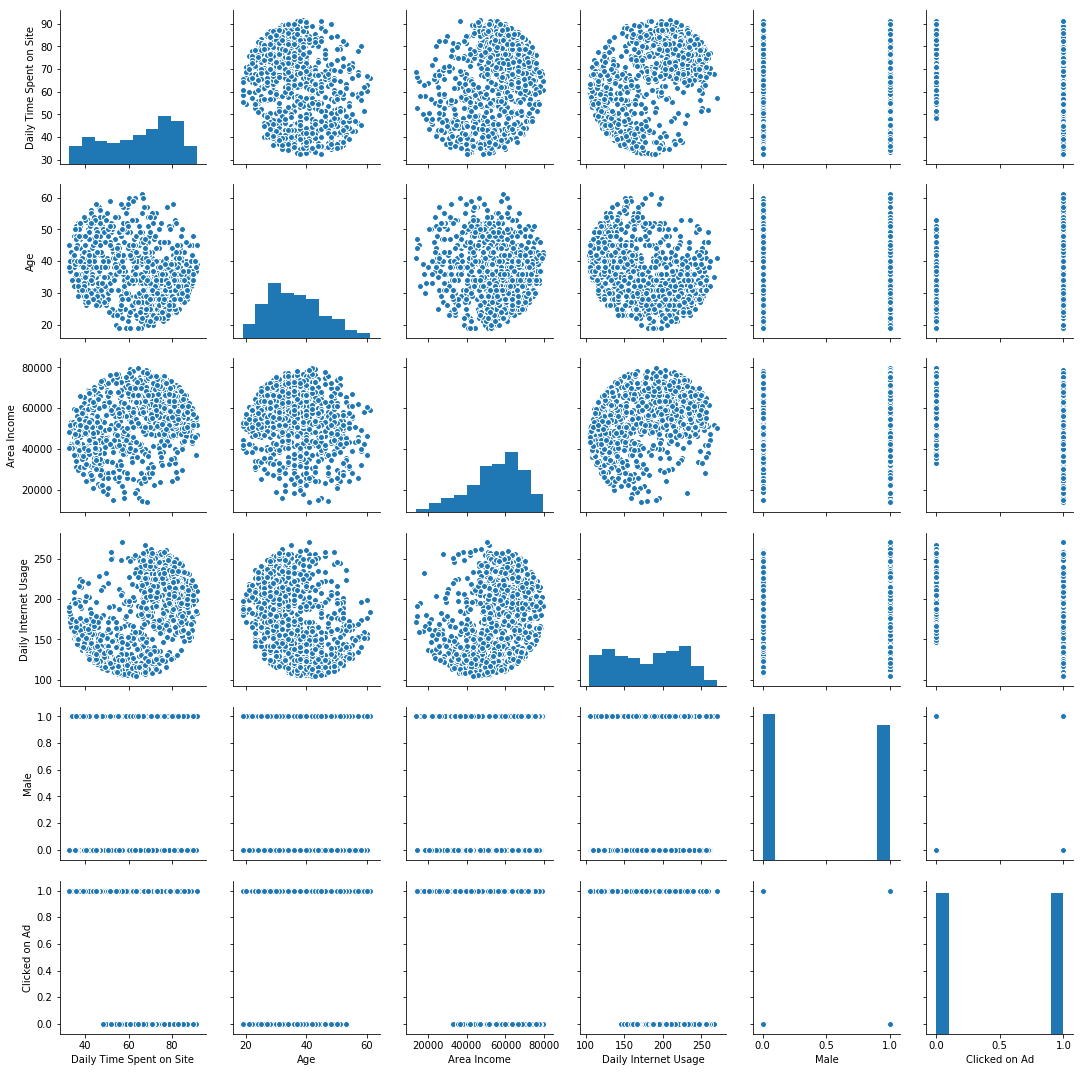

In [108]:
sns.pairplot(df,palette="rainbow")

In [109]:
df.columns


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [110]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df["Clicked on Ad"]
             

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model = LogisticRegression()

In [115]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
predicts = model.predict(x_test)

In [117]:
from sklearn.metrics import confusion_matrix,classification_report

In [118]:
print(confusion_matrix(predicts,y_test))
print(classification_report(predicts,y_test))

[[89  9]
 [ 9 93]]
             precision    recall  f1-score   support

          0       0.91      0.91      0.91        98
          1       0.91      0.91      0.91       102

avg / total       0.91      0.91      0.91       200



In [119]:
from sklearn.model_selection import GridSearchCV
v=np.logspace(0,4,10)
c = {"penalty":["l1","l2"],"C":v}

In [120]:
gsc = GridSearchCV(LogisticRegression(),c ,refit=True,verbose=0)

In [121]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [122]:
pred = gsc.predict(x_test)

In [123]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[98  3]
 [ 0 99]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98       101
          1       0.97      1.00      0.99        99

avg / total       0.99      0.98      0.98       200

